In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\Soham Gon\Desktop\blinkit analysis\Data\csv\blinkit_delivery_performance.csv")
# df.head()

In [2]:
# checking each columns and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB


In [3]:
# changing data in 'delivery_status' column.

df['delivery_status'] = df['delivery_status'].str.lower()

In [4]:
df['delivery_status']

0       on time
1       on time
2       on time
3       on time
4       on time
         ...   
4995    on time
4996    on time
4997    on time
4998    on time
4999    on time
Name: delivery_status, Length: 5000, dtype: object

In [5]:
df.isnull().mean() * 100

# reasons_if_delayed       38.04
# column : reasons_if_delayed has 38.04% of it's rows empty.

order_id                  0.00
delivery_partner_id       0.00
promised_time             0.00
actual_time               0.00
delivery_time_minutes     0.00
distance_km               0.00
delivery_status           0.00
reasons_if_delayed       38.04
dtype: float64

In [6]:
df['reasons_if_delayed'].unique()

array([nan, 'Traffic'], dtype=object)

In [7]:
df['reasons_if_delayed'] = df['reasons_if_delayed'].replace({
    'Traffic' : 'traffic'
})

In [8]:
df['reasons_if_delayed'].unique()

array([nan, 'traffic'], dtype=object)

In [9]:
df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,on time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,on time,traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,on time,traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,on time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,on time,traffic


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB


In [11]:
#  2   promised_time          5000 non-null   object 
#  3   actual_time            5000 non-null   object 
# changing datatype column from 'object' to 'datetime64[ns]' datatype.

df['promised_time'] = pd.to_datetime(df['promised_time'], format = '%Y-%m-%d %H:%M:%S')
df['actual_time'] = pd.to_datetime(df['actual_time'], format = '%Y-%m-%d %H:%M:%S')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     3098 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 312.6+ KB


In [14]:
df['delivery_year'] = df['promised_time'].dt.year
df['delivery_month'] = df['promised_time'].dt.month
df['delivery_day'] = df['promised_time'].dt.day
df['delivery_week'] = df['promised_time'].dt.isocalendar().week
df['delivery_week_period'] = df['promised_time'].dt.to_period('W')

In [15]:
df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,delivery_year,delivery_month,delivery_day,delivery_week,delivery_week_period
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,on time,NaN,2024,7,17,29,2024-07-15/2024-07-21
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,on time,traffic,2024,5,28,22,2024-05-27/2024-06-02
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,on time,traffic,2024,9,23,39,2024-09-23/2024-09-29
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,on time,NaN,2023,11,24,47,2023-11-20/2023-11-26
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,on time,traffic,2023,11,20,47,2023-11-20/2023-11-26


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     3098 non-null   object        
 8   delivery_year          5000 non-null   int32         
 9   delivery_month         5000 non-null   int32         
 10  delivery_day           5000 non-null   int32         
 11  delivery_week          5000 non-null   UInt32        
 12  delivery_week_period   5000 non-null   period[W-SUN] 
dtypes: 

In [17]:
# filling null rows in 'reasons_if_delayed' column.
df['reasons_if_delayed'] = df['reasons_if_delayed'].fillna('not given')

In [18]:
# percentage of delivery where delivery agents tagged the reason_if_delayed as 'traffic'.
reason_for_traffic_summary = (
    df.groupby('reasons_if_delayed', as_index = False).agg
    (
        delivery_count = ('order_id', 'count')
    )
)

reason_for_traffic_summary['reasons'] = (reason_for_traffic_summary['delivery_count'] / reason_for_traffic_summary['delivery_count'].sum()) * 100 
# reason_for_traffic_summary.plot(x = 'reasons_if_delayed', y = 'reasons', figsize = (8,5), kind = 'barh', title = 'reasons for delay chart')

reason_for_traffic_summary

,reasons_if_delayed,delivery_count,reasons
0,not given,1902,38.04
1,traffic,3098,61.96


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
 8   delivery_year          5000 non-null   int32         
 9   delivery_month         5000 non-null   int32         
 10  delivery_day           5000 non-null   int32         
 11  delivery_week          5000 non-null   UInt32        
 12  delivery_week_period   5000 non-null   period[W-SUN] 
dtypes: 

In [20]:
# analysing monthly delivery delay.

monthly_delivery_delay_traffic = (
    df.query("reasons_if_delayed == 'traffic'") # using query() function to find reasons where 'traffic' is mentioned.
    .groupby('delivery_month', as_index=False).agg
    (
        traffic_delay_cnt = ('reasons_if_delayed', 'count')
    )
)

monthly_delivery_delay_traffic['bad_delivery_total_pct'] = (monthly_delivery_delay_traffic['traffic_delay_cnt'] / monthly_delivery_delay_traffic['traffic_delay_cnt'].sum()) * 100
monthly_delivery_delay_traffic

,delivery_month,traffic_delay_cnt,bad_delivery_total_pct
0,1,179,5.777921
1,2,152,4.906391
2,3,222,7.165913
3,4,288,9.296320
4,5,333,10.748870
5,6,291,9.393157
6,7,313,10.103292
7,8,330,10.652034
8,9,323,10.426081
9,10,304,9.812782


<Axes: title={'center': 'monthly late delivery chart regarding traffic'}, xlabel='delivery_month'>

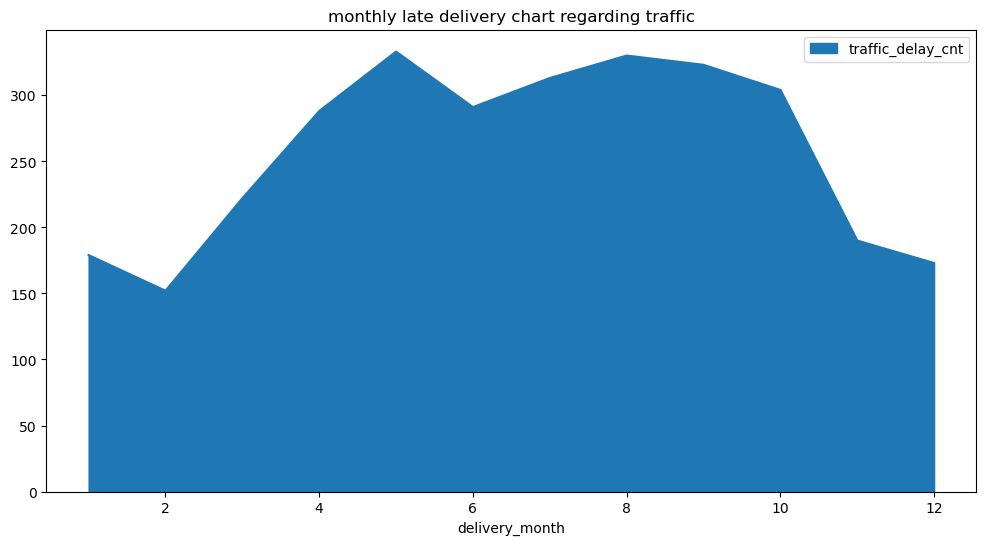

In [21]:
# the above mentioned query or snippet can also be done using boolean masking or boolean filtering without
# using query() function.

where = df['reasons_if_delayed'] == 'traffic'

monthly_delivery_delay_traffic = (
    df[where] # using the mask.
    .groupby('delivery_month', as_index=False).agg
    (traffic_delay_cnt = ('reasons_if_delayed', 'count'))
)

# monthly_delivery_delay_traffic
monthly_delivery_delay_traffic.plot(x = 'delivery_month', y = 'traffic_delay_cnt', kind = 'area', figsize= (12,6), title = 'monthly late delivery chart regarding traffic')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
 8   delivery_year          5000 non-null   int32         
 9   delivery_month         5000 non-null   int32         
 10  delivery_day           5000 non-null   int32         
 11  delivery_week          5000 non-null   UInt32        
 12  delivery_week_period   5000 non-null   period[W-SUN] 
dtypes: 

In [23]:
df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,delivery_year,delivery_month,delivery_day,delivery_week,delivery_week_period
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,on time,not given,2024,7,17,29,2024-07-15/2024-07-21
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,on time,traffic,2024,5,28,22,2024-05-27/2024-06-02
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,on time,traffic,2024,9,23,39,2024-09-23/2024-09-29
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,on time,not given,2023,11,24,47,2023-11-20/2023-11-26
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,on time,traffic,2023,11,20,47,2023-11-20/2023-11-26


<Axes: title={'center': 'weekly late delivery chart due to reason traffic'}, xlabel='delivery_week'>

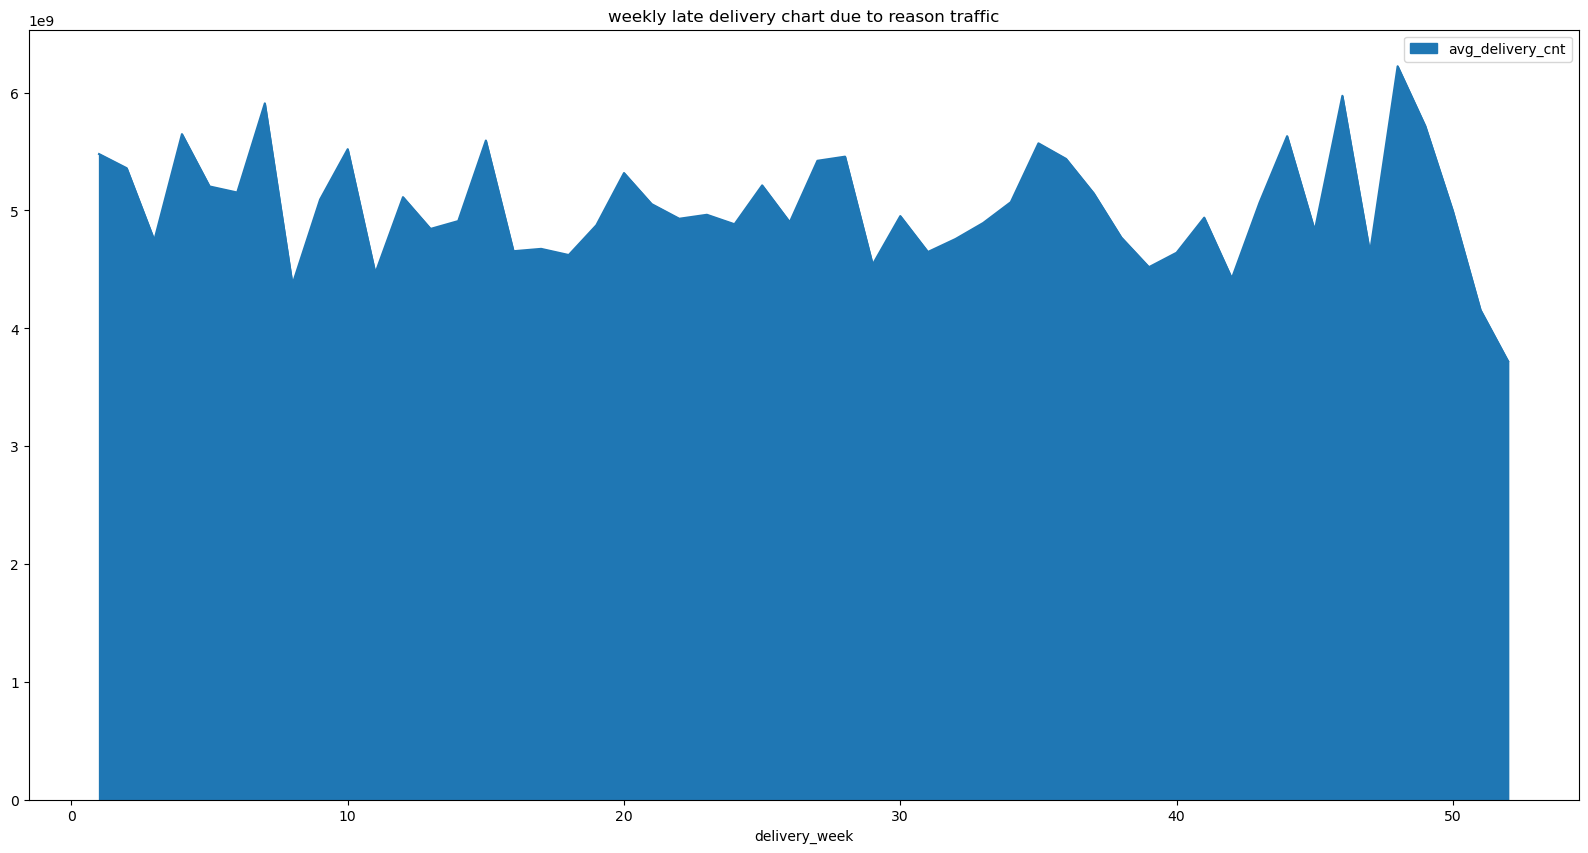

In [24]:
# weekly avg late delivery chart.

weekly_late_delivery = (
    df.query("reasons_if_delayed == 'traffic'")
    .groupby('delivery_week', as_index=False)
    .agg(avg_delivery_cnt = ('order_id', 'mean'))
)

weekly_late_delivery.plot(x='delivery_week',
                          y = 'avg_delivery_cnt',
                          figsize=(20, 10),
                          kind='area',
                          title="weekly late delivery chart due to reason traffic")

<Axes: title={'center': 'Average timing for delivery'}, ylabel='reasons_if_delayed'>

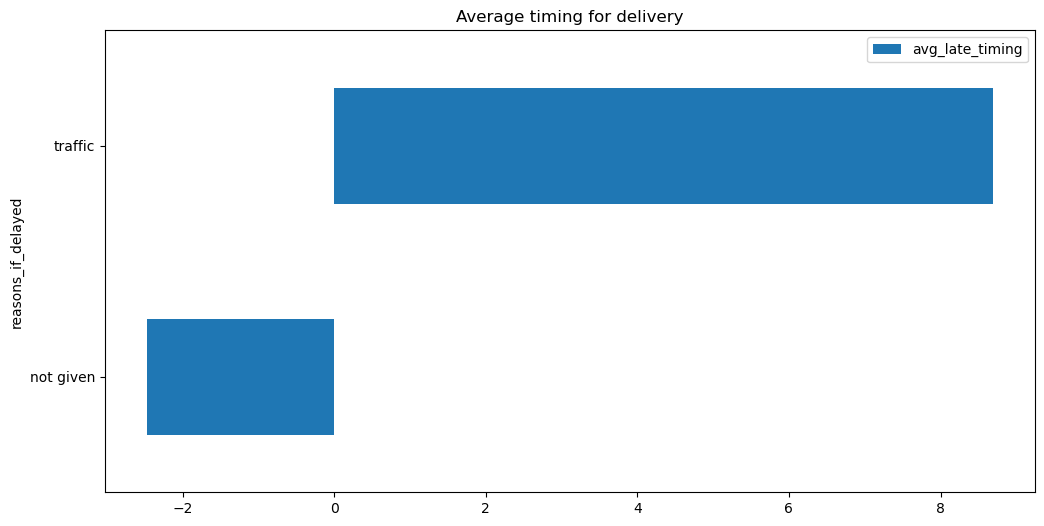

In [25]:
# avg timing delay where reason as 'traffic' is mentioned and where not.

avg_timing_delay = (
    df.groupby('reasons_if_delayed', as_index=False)
    .agg(avg_late_timing = ('delivery_time_minutes', 'mean'),
         delivery_cnt = ('order_id', 'count'))
)

avg_timing_delay.plot(x='reasons_if_delayed',
                      y='avg_late_timing',
                      figsize=(12, 6),
                      kind='barh',
                      title='Average timing for delivery')

In [26]:
# delivery count per delivery agent.
df.groupby('delivery_partner_id').size().reset_index()

,delivery_partner_id,0
0,43,1
1,50,1
2,66,1
3,70,1
4,87,1
...,...,...
4995,99889,1
4996,99898,1
4997,99899,1
4998,99958,1


In [41]:
# print(df['distance_km'].max())
# print(df['distance_km'].min())
# print(df['distance_km'].mean().round(2))

# '''
# 5.0
# 0.5
# 2.7180480000000005
# '''

# creating a separate column flagging each delivery distance.
conditions = [
    (df['distance_km'] >= 0) & (df['distance_km'] <= 0.99),
    (df['distance_km'] >= 1) & (df['distance_km'] <= 1.99),
    (df['distance_km'] >= 2) & (df['distance_km'] <= 2.99),
    (df['distance_km'] >= 3) & (df['distance_km'] <= 3.99),
    (df['distance_km'] >= 4) & (df['distance_km'] <= 5)
]

select = ['below 1 km', 'between 1 km', 'between 2 km', 'between 3 km', 'between 4 km']

df['delivery_distance_flag'] = np.select(conditions, select, default="unknown distance")

In [42]:
df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,delivery_year,delivery_month,delivery_day,delivery_week,delivery_week_period,delivery_distance_flag
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,on time,not given,2024,7,17,29,2024-07-15/2024-07-21,below 1 km
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,on time,traffic,2024,5,28,22,2024-05-27/2024-06-02,below 1 km
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,on time,traffic,2024,9,23,39,2024-09-23/2024-09-29,between 3 km
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,on time,not given,2023,11,24,47,2023-11-20/2023-11-26,between 2 km
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,on time,traffic,2023,11,20,47,2023-11-20/2023-11-26,between 2 km


<Axes: title={'center': 'delivery count per distance category'}, ylabel='delivery_distance_flag'>

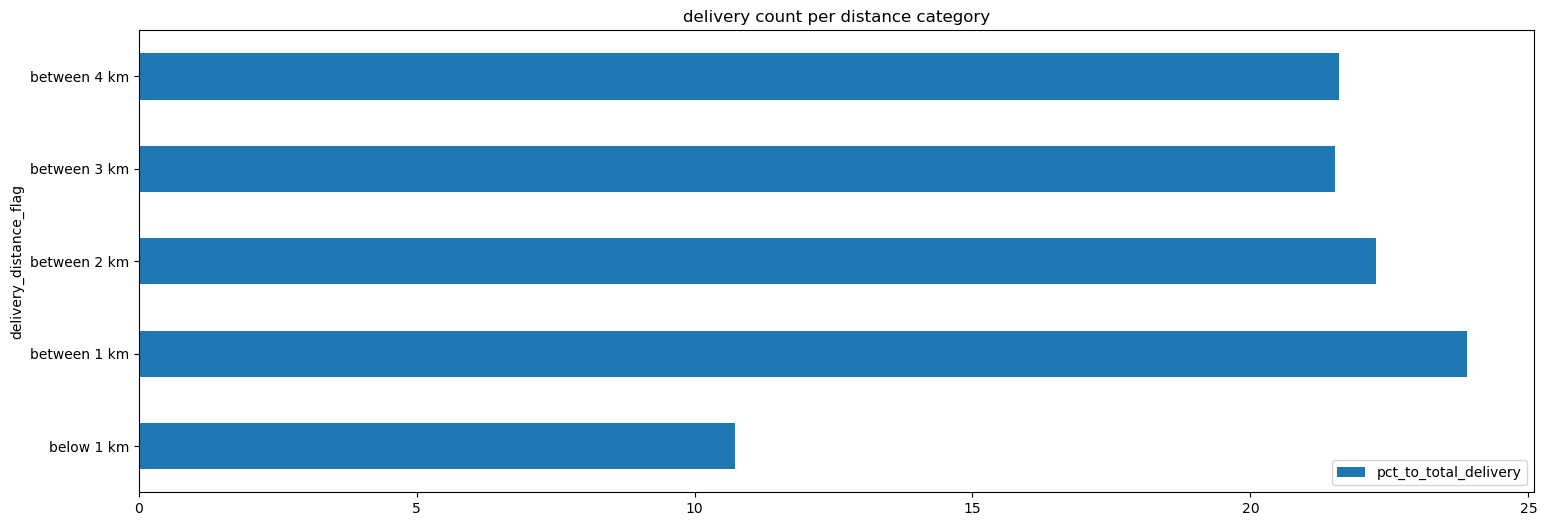

In [50]:
# delivery count per distance group.

delivery_per_km = (
    df.groupby('delivery_distance_flag', as_index=False)
    .agg(total_delivery_count = ('order_id', 'count'))
)

delivery_per_km['pct_to_total_delivery'] = (
    delivery_per_km['total_delivery_count'] / delivery_per_km['total_delivery_count'].sum()
    ) * 100

delivery_per_km.plot(
    x='delivery_distance_flag',
    y=['pct_to_total_delivery'],
    figsize=(18,6),
    kind='barh',
    title='delivery count per distance category'
)

### Checking data quality before exportation the cleaned dataset to the designated database.

In [ ]:
# df[(df['delivery_time_minutes'] > 40)] # no deliveries that took more than 40 minutes.
# df[df['delivery_time_minutes'] < -4] # this query returns 316 rows.

df[(df['distance_km'] < 0) | (df['distance_km'] > 5)] # no deliveries that follows the conditions. So, the data is safe.

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,delivery_year,delivery_month,delivery_day,delivery_week,delivery_week_period


In [51]:
# saving the cleaned file.

df.to_csv(r"C:\Users\Soham Gon\Desktop\blinkit analysis\Data\cleaned\blinkit_delivery_perf_cleaned.csv", index=False)
print('file is exported to the cleaned file!')

file is exported to the cleaned file!


In [1]:
df.info()

NameError: name 'df' is not defined

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Soham Gon\Desktop\blinkit analysis\Data\cleaned\blinkit_delivery_perf_cleaned.csv')
df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed,delivery_year,delivery_month,delivery_day,delivery_week,delivery_week_period,delivery_distance_flag
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,on time,not given,2024,7,17,29,2024-07-15/2024-07-21,below 1 km
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,on time,traffic,2024,5,28,22,2024-05-27/2024-06-02,below 1 km
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,on time,traffic,2024,9,23,39,2024-09-23/2024-09-29,between 3 km
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,on time,not given,2023,11,24,47,2023-11-20/2023-11-26,between 2 km
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,on time,traffic,2023,11,20,47,2023-11-20/2023-11-26,between 2 km


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   delivery_partner_id     5000 non-null   int64  
 2   promised_time           5000 non-null   object 
 3   actual_time             5000 non-null   object 
 4   delivery_time_minutes   5000 non-null   float64
 5   distance_km             5000 non-null   float64
 6   delivery_status         5000 non-null   object 
 7   reasons_if_delayed      5000 non-null   object 
 8   delivery_year           5000 non-null   int64  
 9   delivery_month          5000 non-null   int64  
 10  delivery_day            5000 non-null   int64  
 11  delivery_week           5000 non-null   int64  
 12  delivery_week_period    5000 non-null   object 
 13  delivery_distance_flag  5000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memor

In [4]:
df['actual_time'] = pd.to_datetime(df['actual_time'], format = '%Y-%m-%d %H:%M:%S')
df['promised_time'] = pd.to_datetime(df['promised_time'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   delivery_partner_id     5000 non-null   int64         
 2   promised_time           5000 non-null   datetime64[ns]
 3   actual_time             5000 non-null   datetime64[ns]
 4   delivery_time_minutes   5000 non-null   float64       
 5   distance_km             5000 non-null   float64       
 6   delivery_status         5000 non-null   object        
 7   reasons_if_delayed      5000 non-null   object        
 8   delivery_year           5000 non-null   int64         
 9   delivery_month          5000 non-null   int64         
 10  delivery_day            5000 non-null   int64         
 11  delivery_week           5000 non-null   int64         
 12  delivery_week_period    5000 non-null   object  

In [6]:
# saving the csv file.
df.to_csv(r'C:\Users\Soham Gon\Desktop\blinkit analysis\Data\cleaned\blinkit_delivery_cleaned.csv', index=False)
print('file is saved to the designation...')

file is saved to the designation...
